<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/eras/eras/tune/programs/analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title 前処理
# import
# file dealing
import os
from os import path
import shutil
from google.colab import drive
import datetime
# data dealing
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc
from time import sleep
# machine learning (back)
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, initializers, callbacks
# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
# others
import json
from collections import OrderedDict
import pprint


# gdrive 接続
if not path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Already confirm to build gdrive")

# colab テンポラリディレクトリの作成
desk = '/content/desk'
if not os.path.exists(desk):
  os.mkdir(desk)
os.chdir(desk)
print("Created at /content/desk")


Already confirm to build gdrive
Created at /content/desk


#データをインポート

In [67]:
pathHistories = "/content/drive/MyDrive/colab/histories"
os.chdir(pathHistories)

history_directories = os.listdir(pathHistories)
history_directories.remove('.ipynb_checkpoints')
history_directories.reverse()

for each in history_directories:
  print(each)

0113-1408
0112-1834
0112-1631
0112-1552


In [68]:
import re

pickups = [0] # pichup the acsending order 

examines = []

csv_pattern = re.compile(".*\.csv")
json_pattern = re.compile(".*\.json")
cce_pattern = re.compile(".*cce.*")
mse_pattern = re.compile(".*mse.*")

for pick_one in pickups:
  print("the directory : ", history_directories[pick_one])
  inFiles = os.listdir(history_directories[pick_one])
  print("in:", inFiles)

  # desk に持ってくる機能
  # dst = os.path.join(desk, history_directories[pick_one])
  # shutil.copytree(history_directories[pick_one], dst, ignore=None, copy_function=shutil.copy2)
  csvs = []
  for file in inFiles:
    # when csv files    
    if csv_pattern.match(file):
      # それを変数として取り込む
      file_path = os.path.join(pathHistories, history_directories[pick_one])
      file_path = os.path.join(file_path, file)

      if cce_pattern.match(file):
        page = {
            "loss" : "cce",
            "data" : pd.read_csv(file_path, engine='python') 
        }
      elif mse_pattern.match(file):
        page = {
            "loss" : "mse",
            "data" : pd.read_csv(file_path, engine='python')
        }

      csvs.append(page)
  #/for file
  examines.append(csvs)
  print("-----------------------------------------------------------------------------------------------------")
#/for

the directory :  0113-1408
in: ['0113-1408cce.csv', 'situation.json', '0113-1408mse.csv']
-----------------------------------------------------------------------------------------------------


In [57]:
def plot_one_learning(one_learning):
  HEIGHT = 2
  WIDTH = 2
  fig = plt.figure()
  LOSS = fig.add_subplot(HEIGHT, WIDTH, 1)
  ACC = fig.add_subplot(HEIGHT, WIDTH, 2)
  plt.subplots_adjust(left=None, bottom=None, right=1.5, top=1.5, wspace=0.5, hspace=0.5)

  # 1,1 loss
  loss = one_learning["loss"]
  val_loss = one_learning["val_loss"]

  loss_props = {
        'title' : 'Loss values plot',
        'xlabel' : 'epoch',
        'ylabel' : 'value'
    }
  LOSS.set(**loss_props)
  LOSS.plot(loss, label='loss', color='blue')
  LOSS.plot(val_loss, label='val_loss', color='orange')
  LOSS.legend(loc='best')

  # 1,2 acc
  acc = one_learning['acc']
  val_acc = one_learning['val_acc']
  acc_props = {
        'title' : 'Accuracy values plot',
        'xlabel' : 'epoch',
        'ylabel' : 'value'
    }
  ACC.set(**acc_props)
  ACC.plot(acc, label='acc', color='blue')
  ACC.plot(val_acc, label='val_acc', color='orange')
  ACC.legend(loc='best')


cce
mse


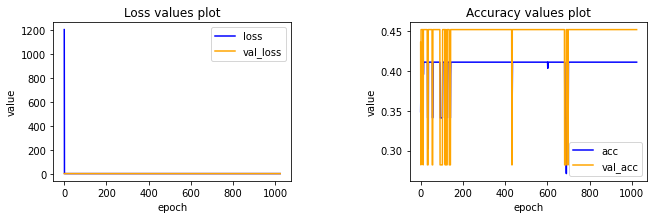

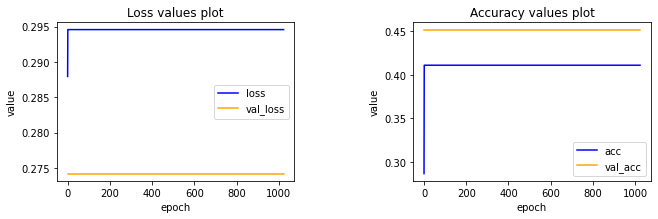

In [69]:
for n, one in enumerate(examines[0]):
  print(one["loss"])
  plot_one_learning(one["data"])